In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from scipy.stats import pearsonr

In [40]:
# Función para ajustar el factor de sensibilidad S_i

def ajuste_lineal_PICOFOX(N_i, N_Ga, C_i, C_Ga, SI_0 = 1, graf = False, r = False, prt = False):

        """Esta función recibe cuatro sets de datos de una experimento de curva de caliabración (listas de python idealmente de 3 o más puntos para validez del ajuste):
           -N_i: set de datos de las cuentas de la especie de interés.
           -N_Ga: set de datos de las cuentas de Galio.
           -C_i: set de datos de las concentraciones conocidas de la especie de interés.
           -C_Ga: set de datos de las concentraciones conocidas de Galio.
           Adicionalmente se puede modificar la estimación inicial del factor de sensibilidad (SI_0) para agilizar el ajuste.
           Para visualizar gráfica del ajuste ingresar en input graf=True.
           Para visualizar valor del factor de sensibilidad ajustado ingresar en input prt=True."""

        # Tratamiento de variables
        N_i = np.array(N_i)
        N_Ga = np.array(N_Ga)
        C_i = np.array(C_i)
        C_Ga = np.array(C_Ga)

        # Verificación de cantidad de datos
        if len(N_i) < 3 or len(N_Ga) < 3 or len(C_i) < 3 or len(C_Ga) < 3:
            return "Error: Puntos insuficientes para ajuste lineal válido, ingrese al menos tres puntos."

        # Cálculo de factor de sensibilidad
        coef = N_Ga * C_i / C_Ga
        coef = np.array(coef)

        # Cálculo de coeficiente de correlación de Pearson
        pearson_r = pearsonr(coef, N_i)
        if r == True:
            print(f'R = {pearson_r.statistic:.4f}')

        # Función de ajuste
        def fun(x, m):
            return m*x

        # Función de residuos
        def res_fun(SI):
            return N_i - fun(coef, SI)

        # Ajuste de parámetros por mínimos cuadrados
        params_adj = least_squares(res_fun, SI_0, ftol=1e-15, xtol=1e-15, gtol=1e-15)
        SI_adj = params_adj.x
        if prt == True:
            print('SI_adj = ', SI_adj[0])

        # Gráfica
        if graf == True:
            plt.figure(figsize=(6, 4))
            plt.plot(coef, N_i, 'o', label='Datos')
            plt.plot(coef, fun(coef, SI_adj), 'r', label='Ajuste')
            plt.xlabel('N_Ga*C_i/C_Ga')
            plt.ylabel('N_i')
            plt.legend()
            plt.title(f'Ajuste lineal R = {pearson_r.statistic:.4f}')
            plt.show()

        return SI_adj[0]

SI_adj =  0.07640210083161678


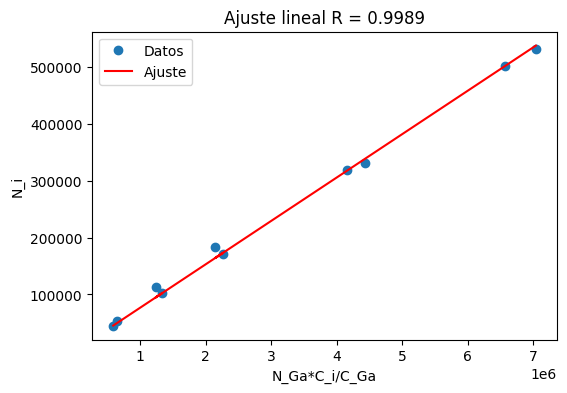

np.float64(0.07640210083161678)

In [39]:
# Ejemplo del manual del PICOFOX
Ci_manual = [2.533, 2.533, 5.303, 5.303, 10.537, 10.537, 20.226, 20.226, 35.415, 35.415]

Ni_manual = [44827, 53532, 102325, 112951, 171532, 184011, 318960, 331489, 502911, 531451]

C_Ga_manual = [10] * 10

N_Ga_manual = [2315161, 2526139, 2518817, 2326950, 2152450, 2038974, 2057896, 2189621, 1853764, 1988947]

ajuste_lineal_PICOFOX(Ni_manual, N_Ga_manual, Ci_manual, C_Ga_manual, graf = True, prt = True)

In [21]:
# Función de cálculo de concentración con factor de sensibilidad estimado

def calc_concentracion_PICOFOX(calc_set, SI = False, adj_set = False):

    """Esta función calcula la concentración de una especie de interés utilizando los siguientes inputs:
       - calc_set: lista de listas de pyhon que contiene:
                  - calc_set[0]: número de cuentas de cuentas de especie de interés (N_i).
                  - calc_set[1]: número de cuentas de cuentas de Galio (N_Ga).
                  - calc_set[2]: concentración conocida de Galio (C_Ga).
       Adicionalmente se requiere un input para SI o adj_set.
       - SI: factor de sensibilidad conocido para la especie de interés.
       - adj_set: set de datos para ajustar linealmente un valor para SI, este es una lista de listas de python que contiene:
                  - adj_set[0]: número de cuentas de cuentas de especie de interés (N_i).
                  - adj_set[1]: número de cuentas de cuentas de Galio (N_Ga).
                  - adj_set[2]: concentración conocida de especie de interés (C_i).
                  - adj_set[3]: concentración conocida de Galio (C_Ga).
       adj_set debe contener al menos tres puntos para que el ajuste sea válido."""

    if SI == False and adj_set == False:
        return "Error: Información insuficiente, entrege un valor para factor de sensibilidad o un set de datos para ajuste de este parámetro."

    elif SI != False and adj_set != False:
        return "Error: Solo entrege un valor para factor de sensibilidad o un set de datos para ajuste de este parámetro, no ambos."

    elif SI == False and adj_set != False:
        SI = ajuste_lineal_PICOFOX(adj_set[0], adj_set[1], adj_set[2], adj_set[3])

    # Tratamiento de variables
    N_i, N_Ga, C_Ga = calc_set
    N_i = np.array(N_i)
    N_Ga = np.array(N_Ga)
    C_Ga = np.array(C_Ga)

    # Cálculo de concentraciones
    C_i = N_i * C_Ga / (N_Ga * SI)
    C_i = np.array(C_i)

    return C_i

In [28]:
# Ejemplo cálculo de concentraciones

calc_set_ejemplo = [Ni_manual, N_Ga_manual, C_Ga_manual]
adj_set_ejemplo = [Ni_manual, N_Ga_manual, Ci_manual, C_Ga_manual]
Ci_ejemplo = calc_concentracion_PICOFOX(calc_set_ejemplo, adj_set = adj_set_ejemplo)

for i in Ci_ejemplo:
    print(i)

2.534271716135925
2.773645320503117
5.317161322378089
6.353276083699189
10.430539664939705
11.812091351885153
20.286517459604635
19.815036258344758
35.50842345572208
34.97314733636146
